In [13]:
run my_recom.py

In [2]:
from gerrychain import Graph, updaters, Election
from gerrychain.metrics import polsby_popper
from counties import *
from partisan_dislocation import *
from plotting import *

In [3]:
utah_graph = Graph.from_json('ChainUtilityData/graph_august.json')

In [4]:
my_updaters = {"population": updaters.Tally('POP100', alias="population"),
                       "polsby_popper": polsby_popper,
                       "split_counties": SplitCounties(),
                       'SEN10': Election('SEN10', {"Dem": "SEN_DEM", "Rep": "SEN_REP"}),
                       'G10': Election('G10', {"Dem": "G_DEM", "Rep": "G_REP"}),
                       'COMB10': Election('COMB10', {"Dem":"COMB_DEM", "Rep":"COMB_REP"}),
                       'assignment_array': AssignmentArray()
                      }

In [5]:
partition0 = GeographicPartition(utah_graph, 'US_Distric', my_updaters)

In [6]:
ideal_pop = np.mean(list(partition0['population'].values()))

In [14]:
recom1 = ReCom('POP100', ideal_pop, 0.02)

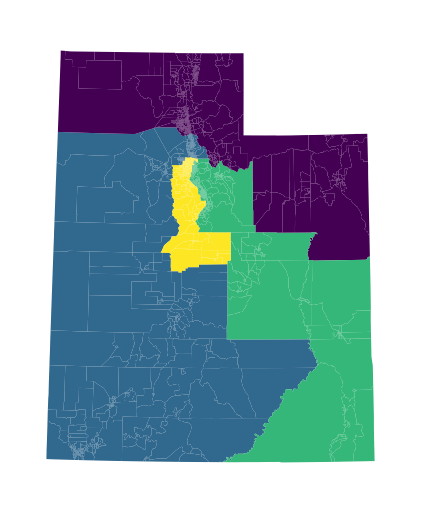

In [8]:
plot_district_map(partition0.assignment)

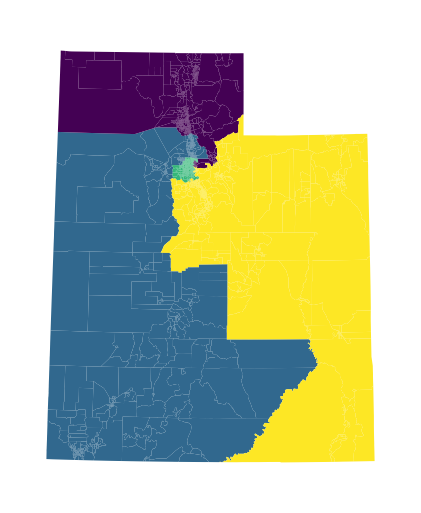

In [24]:
plot_district_map(recom1(recom1(partition0)).assignment)

In [21]:
recom1(recom1(partition0)).flips

{0: 1,
 1: 1,
 2: 1,
 3: 1,
 4: 1,
 5: 1,
 6: 1,
 7: 1,
 8: 1,
 9: 1,
 10: 1,
 11: 1,
 12: 1,
 13: 1,
 14: 1,
 15: 1,
 16: 1,
 2059: 1,
 2060: 1,
 17: 1,
 18: 1,
 2065: 1,
 19: 1,
 21: 1,
 20: 1,
 22: 1,
 2067: 1,
 26: 1,
 23: 1,
 24: 1,
 27: 1,
 25: 1,
 28: 1,
 2074: 1,
 29: 1,
 34: 1,
 35: 1,
 30: 1,
 37: 1,
 38: 1,
 39: 1,
 32: 1,
 33: 1,
 36: 1,
 40: 1,
 41: 1,
 42: 1,
 43: 1,
 47: 1,
 48: 1,
 50: 1,
 46: 1,
 49: 1,
 52: 1,
 51: 1,
 54: 1,
 53: 1,
 55: 1,
 57: 1,
 58: 1,
 56: 1,
 59: 1,
 62: 1,
 61: 1,
 63: 1,
 65: 1,
 64: 1,
 67: 1,
 66: 1,
 60: 1,
 70: 1,
 71: 1,
 68: 1,
 73: 1,
 74: 1,
 75: 1,
 69: 1,
 72: 1,
 2133: 1,
 2137: 1,
 2155: 1,
 2162: 1,
 2170: 1,
 2172: 1,
 2175: 1,
 131: 1,
 132: 1,
 133: 1,
 134: 1,
 135: 1,
 136: 1,
 137: 1,
 138: 1,
 139: 1,
 140: 1,
 2185: 1,
 142: 1,
 143: 1,
 2193: 1,
 2194: 1,
 147: 1,
 2197: 1,
 155: 1,
 31: 1,
 156: 1,
 157: 1,
 158: 1,
 160: 1,
 161: 1,
 162: 1,
 163: 1,
 164: 1,
 165: 1,
 166: 1,
 167: 1,
 168: 1,
 2212: 1,
 2216: 1,
 169

In [26]:
d = pd.read_parquet('ParquetChainData/1599582557d.parquet.gzip')

In [38]:
key = 'Sorted GRep Vote Share 1'
calc_percentile(d.loc[0, key], d[key])

39.93993993993996

In [34]:
np.percentile?